## Titanic Data Analysis

Through this notebook we shall analyze what factors made people more likely to survive. I personally believe it has to do with gender, age and class. I will further break This question down and we can ask "was gender and age a factor in survival" as made popular in the Titanic movie "women and children first". I also want to answer "Did adults who have a higher social class survive more than people in lower social classes?" we would conduct this analysis by means of grouping people by both cabin and people who survived.

###### Load Data from CSV file

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

#Read in csv file 

filename = r'C:\\Users\\Krishna\\Desktop\\udacity projects\\p2\\p2 project\\titanic-data.csv'
titanicdata = pd.read_csv(filename)

#check to see if the data has loaded properly
titanicdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Let's see what the data looks like before cleaning it up

Populating the interactive namespace from numpy and matplotlib


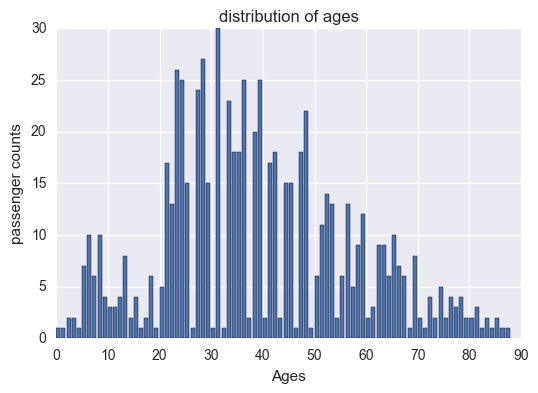

In [157]:
#group by age and count the number of people 
%pylab inline

y = titanicdata.groupby(['Age'])['PassengerId'].count()
N = len(y)
x = range(N)
plt.bar(x, y)
plt.ylabel("passenger counts")
plt.xlabel("Ages")
plt.title("distribution of ages")



Here we see the distribution of ages on the ship. We haven't cleaned the data though so this is why I want to say that we are getting 0 values.

([<matplotlib.patches.Wedge at 0x11b807f0>,
  <matplotlib.text.Text at 0x12d25240>])

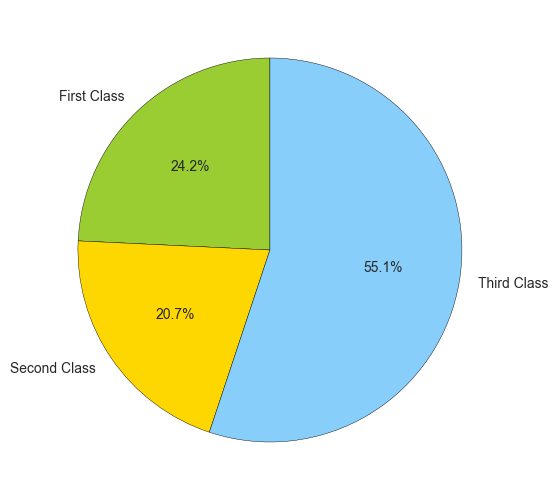

In [25]:
#output a piechart with the distribution of classes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])
labels = 'First Class', 'Second Class', 'Third Class'
colors = ['yellowgreen', 'gold', 'lightskyblue']
f = titanicdata.groupby(['Pclass'])['PassengerId'].count()
pie(f, autopct='%1.1f%%', startangle=90, labels = labels, colors = colors)

We see the makeup of the data according to class here. 24.2% of people were in first class, 20.7% of people were in second class and the majority of people , 55.1%, on the ship were in third class.

## Fixing Data Types

looking at the raw data file itself there are several instances where age is blank or it is half a number so what I want to do here is remove instances where the age is blank because it won't give me any relevant information. and with the half numbers i want to round it up or down to the nearest whole number.

##### Removing records with blank age

In [26]:
#check to see length of the titanic data file
len(titanicdata)

891

In [27]:
titanicdata = titanicdata[titanicdata.Age.notnull()]
len(titanicdata)

714

##### Rounding age values

In [28]:
#loop through each value in the age column and then apply the round function
for x in titanicdata.Age:
    x.round

#print titanicdata.head()

#check to see if length is the same after cleanup step 1
len(titanicdata)

#titanicdata = titanicdata.loc([titanicdata.Age]).apply(np.round) gave me some key error hm..

714

## Data exploration

here are some general descriptions of the data

In [29]:
titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


we see that on average only 40% of the people survived (from this dataset) and the average age of the person aboard the ship was 29.69 

##### Grouping data by survived, gender and age
Here we want to see the number of people that survived, what the gender was, and how old they were 

In [30]:
#Remove all instances with people who didn't live
groupeddata = titanicdata[titanicdata.Survived != 0] 
#print groupeddata

In [31]:
#group data by people who survived

totalsurvivors = groupeddata.groupby(['Survived'])['PassengerId'].count()
print totalsurvivors

Survived
1    290
Name: PassengerId, dtype: int64


After removing the number of people who didn't survive we see that the number of people who survived was 290. Doing a spot check we see that 290/714 (total number of records after the clean up) we get a value of .406 this is equal to the mean that we saw in the previous step. I want to go ahead and create a plot to see how the 290 survivors were distributed across the the 3 classes. And at first I thought let's do a scatter plot.

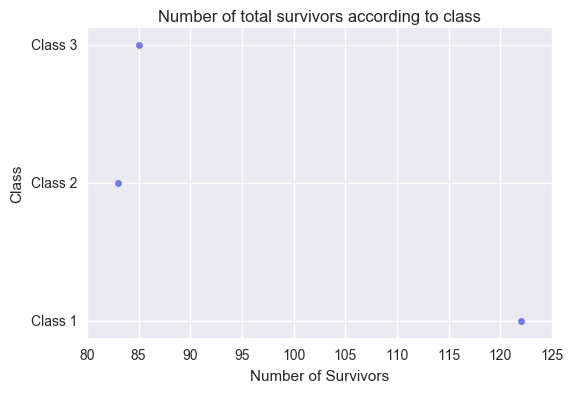

In [33]:
#%pylab inline 

x = groupeddata.groupby(['Pclass'])['PassengerId'].count()
y = np.arange(len(x))
yaxis = ('Class 1','Class 2', 'Class 3')
plt.yticks(y, yaxis)
plt.scatter(x,y, alpha = .5)
plt.xlabel('Number of Survivors')
plt.ylabel('Class')
plt.title('Number of total survivors according to class')
plt.show()

Alright, so this wasn't quite the plot I was hoping to see, but seeing as how I grouped the passengers both by class and the Passenger ID and counted the number of people, this makes sense. But this plot is a little hard to read and doesn't quite break down the survivors into categories such as children, men and women. So let's go ahead and take a look at that in order to see if class and gender was really a factor in survival. 

#### Probability of survival by gender

In [74]:
survivalgendermean = titanicdata.groupby(['Sex'])['Survived'].mean()
print survivalgendermean

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


([<matplotlib.axis.XTick at 0x166cb438>,
 <a list of 2 Text xticklabel objects>)

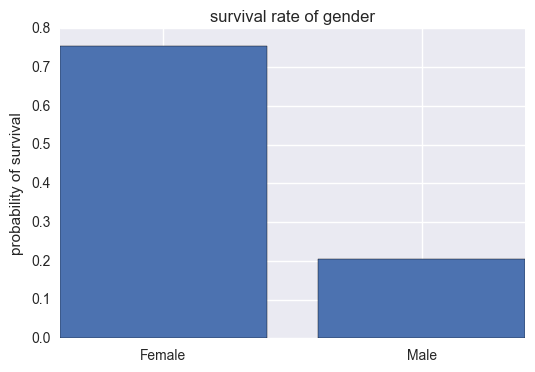

In [89]:
N = len(survivalgendermean)
x = range(N)
plt.bar(x, survivalgendermean, align = 'center')
plt.ylabel("probability of survival")
plt.title("survival rate of gender")
plt.xticks(np.arange(N), ('Female', 'Male'))

Here we see that there is a much greater probability of surviving the titanic if you were female as opposed to male.

#### Probability of Survival by class

In [77]:
survivalbyclass = titanicdata.groupby('Pclass')['Survived'].mean()
print survivalbyclass

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x1a8bc5c0>,
 <a list of 3 Text xticklabel objects>)

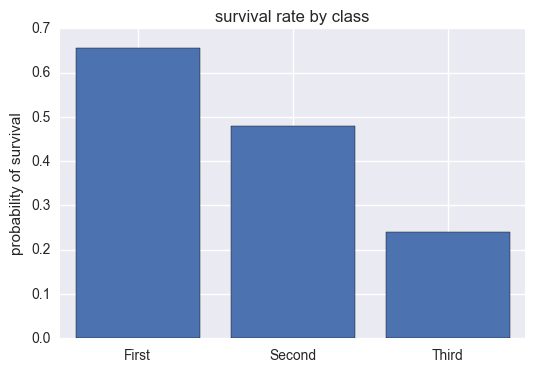

In [156]:
%pylab inline

N = len(survivalbyclass)
x = range(N)
plt.bar(x, survivalbyclass, align = 'center')
plt.ylabel("probability of survival")
plt.title("survival rate by class")
plt.xticks(np.arange(N), ('First', 'Second', 'Third'))

Also I wanted to see the probability of survival by class and if there was a greater chance to survive if you were in a higher class. The step ladder shape of the graph indicates just that.

### Probability of Survival by both Gender and Class

In [90]:
survivalbyboth = titanicdata.groupby(['Pclass','Sex'])['Survived'].mean()
print survivalbyboth

Pclass  Sex   
1       female    0.964706
        male      0.396040
2       female    0.918919
        male      0.151515
3       female    0.460784
        male      0.150198
Name: Survived, dtype: float64


Populating the interactive namespace from numpy and matplotlib
Pclass
1    0.396040
2    0.151515
3    0.150198
Name: Survived, dtype: float64
Pclass
1    0.964706
2    0.918919
3    0.460784
Name: Survived, dtype: float64


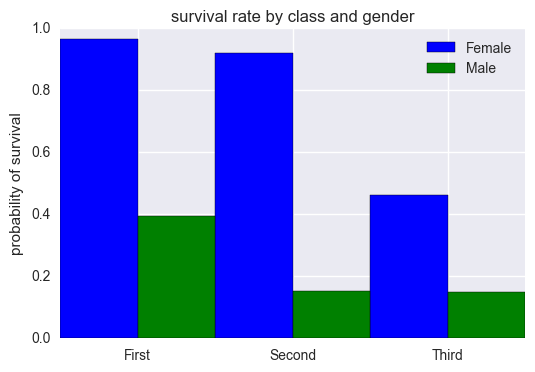

In [123]:
#separate males and females so that we can make 2 separate bars in the chart
%pylab inline
survivingmales = titanicdata[titanicdata.Sex != 'female']
survivingmalesmean = survivingmales.groupby(['Pclass'])['Survived'].mean()
print survivingmalesmean
survivingfemales = titanicdata[titanicdata.Sex != 'male']
survivingfemalesmean = survivingfemales.groupby(['Pclass'])['Survived'].mean()
print survivingfemalesmean

ngroups = 3
index = np.arange(ngroups)
bar_width = .5 

rects1 = plt.bar(index, survivingfemalesmean,bar_width, color = 'b', label = 'Female')
rects2 = plt.bar(index+bar_width, survivingmalesmean,bar_width, color = 'g', label = 'Male')
plt.ylabel("probability of survival")
plt.title("survival rate by class and gender")
plt.xticks(index+ bar_width, ('First', 'Second', 'Third'))
plt.legend()

Putting both our variables together in one graph we have the probability of survival given class and gender. we see that females were favored over males and also that class came into play here. First class was generally more favored than second and second class was generally more favored than third.

#### count of people who survived vs count of people who died

Here I include raw counts of the data of the number of people who survived and died because giving just the proportion would tell the likelihood of someone surviving and not whether they actually survived or not.

In [125]:
numberofsurvived = titanicdata.groupby(['Pclass', 'Sex', 'Survived']).apply(len)
print numberofsurvived

Pclass  Sex     Survived
1       female  0             3
                1            82
        male    0            61
                1            40
2       female  0             6
                1            68
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
dtype: int64


In [141]:
numberdead = titanicdata[titanicdata.Survived == 0]
numberdead = numberdead[numberdead.Sex != 'female']
numberdead = numberdead.groupby(['Pclass', 'Sex', 'Survived']).apply(len)
numberdeadmale = numberdead 
print numberdeadmale

numberdead = titanicdata[titanicdata.Survived == 0]
numberdead = numberdead[numberdead.Sex != 'male']
numberdead = numberdead.groupby(['Pclass', 'Sex', 'Survived']).apply(len)
numberdeadfemale = numberdead 
print numberdeadfemale



Pclass  Sex   Survived
1       male  0            61
2       male  0            84
3       male  0           215
dtype: int64
Pclass  Sex     Survived
1       female  0            3
2       female  0            6
3       female  0           55
dtype: int64


In [143]:
numberalive = titanicdata[titanicdata.Survived != 0]
numberalive = numberalive[numberalive.Sex != 'female']
numberalive = numberalive.groupby(['Pclass', 'Sex', 'Survived']).apply(len)
numberalivemale = numberalive
print numberalivemale

numberalive = titanicdata[titanicdata.Survived != 0]
numberalive = numberalive[numberalive.Sex != 'male']
numberalive = numberalive.groupby(['Pclass', 'Sex', 'Survived']).apply(len)
numberalivefemale = numberalive
print numberalivefemale




Pclass  Sex   Survived
1       male  1           40
2       male  1           15
3       male  1           38
dtype: int64
Pclass  Sex     Survived
1       female  1           82
2       female  1           68
3       female  1           47
dtype: int64


Populating the interactive namespace from numpy and matplotlib


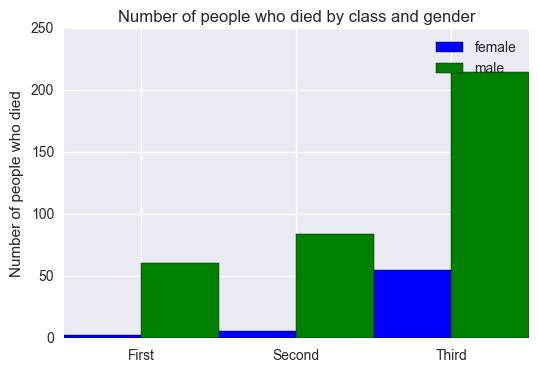

In [153]:
%pylab inline

ngroups = 3
index = np.arange(ngroups)
bar_width = .5 

rects1 = plt.bar(index, numberdeadfemale, bar_width, color = 'b' ,label = 'female')
rects2 = plt.bar(index + bar_width, numberdeadmale, bar_width,color = 'g', label = 'male')

plt.ylabel("Number of people who died")
plt.title("Number of people who died by class and gender")
plt.xticks(index + bar_width , ('First', 'Second', 'Third'))
plt.legend()

As expected there are most deaths within the third class than the second and more deaths within the second than the first.

Populating the interactive namespace from numpy and matplotlib


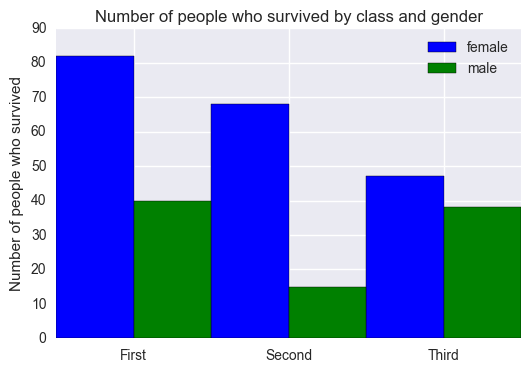

In [155]:
%pylab inline

ngroups = 3
index = np.arange(ngroups)
bar_width = .5 

rects1 = plt.bar(index, numberalivefemale, bar_width, color = 'b' ,label = 'female')
rects2 = plt.bar(index + bar_width, numberalivemale, bar_width,color = 'g', label = 'male')

plt.ylabel("Number of people who survived")
plt.title("Number of people who survived by class and gender")
plt.xticks(index + bar_width , ('First', 'Second', 'Third'))
plt.legend()

As expected once again there are more survivors in the first class than the second and more survivors in the second class than the third.

In [34]:
#count total number of male and female survivors

totalsurvivorsbygender = groupeddata.groupby(['Sex'])['PassengerId'].count()
print totalsurvivorsbygender

Sex
female    197
male       93
Name: PassengerId, dtype: int64


Breaking our survivors down by gender we see that 104 more females made it out than males. This is starting to support my Titanic movie theory of "Women and children first" but we need to do some further analysis and we also need to keep in mind that this entire data set is only a sample as there were 2229 total passengers on board.

In [35]:
#count average, min, and max age of total survivors
survivordata  = groupeddata.groupby(['Survived'])['Age']
survivordata.describe()

Survived       
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

I got curious and wanted to see the average age of the survivor and here we see that the average survivor was in their late 20s but there was a pretty big standard deviation of roughly 15 years.

In [36]:
#how many of the people who did survive were children(in this case < 18)

survivingchildren =  titanicdata[titanicdata.Survived != 0]
survivingchildren = survivingchildren[survivingchildren.Age < 18]
print len(survivingchildren)

#print survivingchildren


61


I wanted to first break the survivors down into children and adults. Here I took the number of people that survived from the data and the I broke it down to only people who were under the age of 18. I got 61 survivors as a result.

In [37]:
#how many of the children who survived were in upper middle and lower classes
kidsbyclass = survivingchildren.groupby(['Pclass'])['PassengerId'].count()
print kidsbyclass

Pclass
1    11
2    21
3    29
Name: PassengerId, dtype: int64


I then went ahead and broke down the 61 survivors by class and found that we had 11 first class children, 21 second class children, and 29 third class children

Populating the interactive namespace from numpy and matplotlib


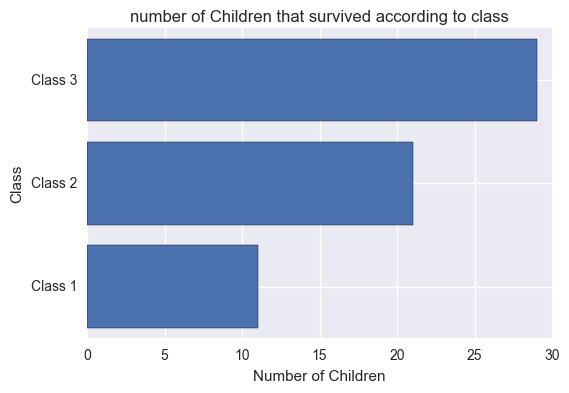

In [38]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(kidsbyclass))
plt.barh(y_pos, kidsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of Children that survived according to class")
plt.xlabel('Number of Children')
plt.ylabel('Class')
plt.show()


Since the scatter plot didn't work earlier, I wanted to represent the findings as a bar graph. I feel as though this is much easier to read. Mathematically if we take 61 survivors away from the total number of survivors, 290, we should get 229 survivors.

In [39]:
#how many of the people who did survive were adults broken down by gender
survivingadults = titanicdata[titanicdata.Survived != 0]
#survivingadults = survivingadults - survivingchildren
survivingadults = survivingadults[survivingadults.Age >= 18]
print len(survivingadults) 

229


In this step I do just that and find that there are 229 adult survivors ages 18 and up. I want to now further break down the data we have by gender and class again.

In [40]:
#number of female adults so we can break them down by class in the next step
femaleadults = survivingadults[survivingadults.Sex != 'male']

#number of adults both male and female that survived
numberofadults = survivingadults.groupby(['Sex'])['PassengerId'].count()
print numberofadults

Sex
female    159
male       70
Name: PassengerId, dtype: int64


I removed the male passengers and then grouped the number of female passengers by the categories 'Sex' and 'PassengerId' and then I counted the remaining records. I got 159 records of adult females that survived the titanic. I also got 70 adult males who survived. This record matches up with our total because 159+70+61 = 290

In [41]:
femaleadultsbyclass = femaleadults.groupby(['Sex','Pclass'])['PassengerId'].count()
print femaleadultsbyclass

Sex     Pclass
female  1         75
        2         56
        3         28
Name: PassengerId, dtype: int64


I then further broke it down by class and this shows us that there were 75 females from first class, 56 females from second class and 28 females from third class. Doing a spot check 75+56+28 = 159. This data hints at the fact that rich females did have more of a chance to make it out alive.

Populating the interactive namespace from numpy and matplotlib


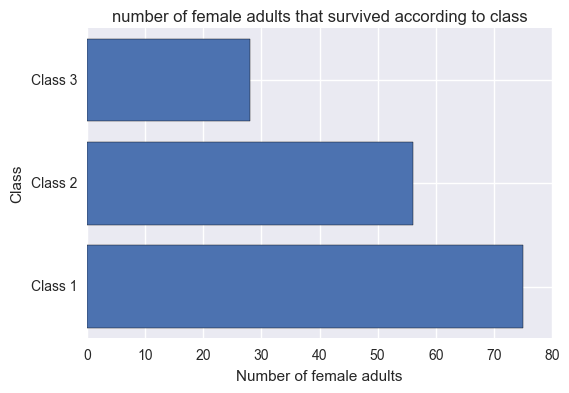

In [42]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(femaleadultsbyclass))
plt.barh(y_pos, femaleadultsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of female adults that survived according to class")
plt.xlabel('Number of female adults')
plt.ylabel('Class')
plt.show()

Here I have graphed out by class the number female adults that survived. From this graph I can start to make inferences about the rest of the population. I am going to do the same process as before on the male population. Doing a spot check we should get 70 male adults because 290 - 61 - 159 = 70

In [43]:
maleadults = survivingadults[survivingadults.Sex != 'female']

In [44]:
maleadultsbyclass = maleadults.groupby(['Sex','Pclass'])['PassengerId'].count()
print maleadultsbyclass

Sex   Pclass
male  1         36
      2          6
      3         28
Name: PassengerId, dtype: int64


When I break the males down by class I see something interesting happening, there are almost as many 3rd class males who survived as there are first class males. This is interesting to see. With the female adults it was step ladder with class 1 having the most and class 2 having the second most and then class 3 having the least. So why then is it different for the male adults?

Populating the interactive namespace from numpy and matplotlib


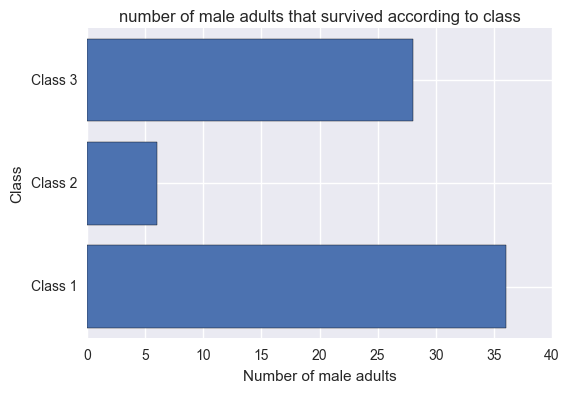

In [45]:
%pylab inline

yaxis = ('Class 1','Class 2', 'Class 3')
y_pos = np.arange(len(maleadultsbyclass))
plt.barh(y_pos, maleadultsbyclass, align='center', alpha=1)
plt.yticks(y_pos, yaxis)
plt.title("number of male adults that survived according to class")
plt.xlabel('Number of male adults')
plt.ylabel('Class')
plt.show()

looking at this, the graph isn't the perfect step ladder like the previous graph. I have a theory and I think there are almost as many 3rd class males that survived as first because 3rd class included workers aboard the ship. When people were escaping to the life boats these workers would guide people to the boats and then commandeer the boats until help arrived and the entire boat survived. 

## Limitations of the dataset

There are various limitations within this dataset and due to these limitations we are required to operate under big assumptions everywhere. For example the dataset is filled with missing values. The way in which we clean up the missing values adds potential for drawbacks to the analysis. For example say we fill in a missing value with a 0 when performing an analysis we will have various different issues when accessing the data if we go to compare the data. If we remove the missing values' instance entirely we are not only limiting our dataset even more but we might also be removing a field that might be important to us in a later analysis and in essence we could see this ripple effect happening across the data.  

There are also limitations that arise with doing an analysis and making assumptions without doing a statistical z or t test. Since we have made assumptions only to one sample picked from the entire population, we can not apply the assumption back to the entire population. While the findings may work for the sample they might not work for the entire population set.

The data set also does not distinguish between correlation and causation. While we found earlier that it was more likely for females in the first class to survive the Titanic, and it did match our sample this might not hold true when applied to the population. The data set also does not tell us to make any assumptions about the population in order to conduct our analysis.

## Conclusions

Using the question that I proposed and doing analysis on the data my conclusions are as follows:
<ol>
1.) The quote "women and children first" from the movie is somewhat accurate. 
2.) There are more women that survived than children and more children that survived than men
3.) From the sample that we analyzed we can say that the factor that made you most likely to survive was if you were a female in class 1
4.) The number of third class males and females were equal, It is my assumption that both males and females in this class were workers aboard the ship who commandeered life boats
</ol>

References:
http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object
https://pythonspot.com/en/matplotlib-bar-chart/
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
http://matplotlib.org/examples/pylab_examples/barchart_demo.html